In [35]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns


In [36]:
df = pd.read_csv("dataset/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [37]:
df.shape

(200000, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 12.2+ MB


In [39]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [40]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [41]:
df.dropna(inplace = True)

In [42]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [43]:
df.drop(['key', df.columns[0]], axis = 1, inplace = True)

In [44]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xe54bc8>,
 'caps': [<matplotlib.lines.Line2D at 0xe543a0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe54fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de5f430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de5f3a0>],
 'means': []}

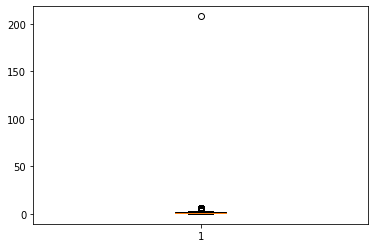

In [46]:
plt.boxplot(df['passenger_count'])

In [48]:
df.drop( df[(df['passenger_count']>100)].index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2865b520>,
 'caps': [<matplotlib.lines.Line2D at 0x2865b880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2865b370>],
 'medians': [<matplotlib.lines.Line2D at 0x2865bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2865bd90>],
 'means': []}

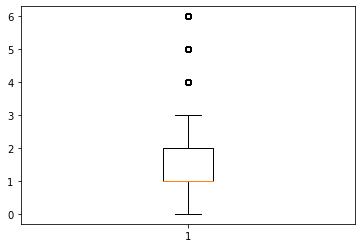

In [49]:
plt.boxplot(df['passenger_count'])

<AxesSubplot:>

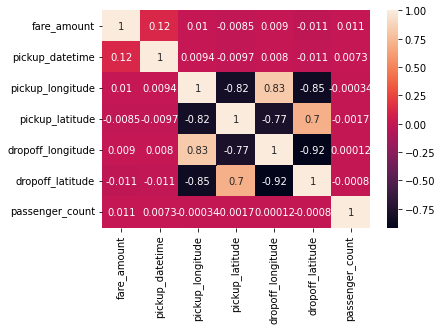

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    radius = 6371
    
    distance = radius * c
    
    return distance


In [52]:
df['dist'] = df.apply(lambda row: haversine_distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x50941d8>,
 'caps': [<matplotlib.lines.Line2D at 0x23190aa8>,
 'boxes': [<matplotlib.lines.Line2D at 0x5094190>],
 'medians': [<matplotlib.lines.Line2D at 0x26736ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26736c58>],
 'means': []}

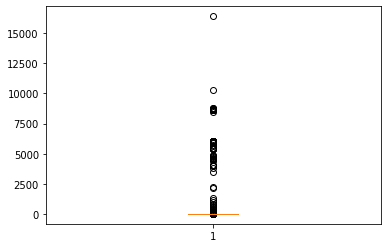

In [53]:
plt.boxplot(df['dist'])

In [55]:
Q1 = df['dist'].quantile(0.25)
Q3 = df['dist'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_no_outliers = df[(df['dist'] >= lower_bound) & (df['dist'] <= upper_bound)]


In [56]:
df.drop(df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21276c28>,
 'caps': [<matplotlib.lines.Line2D at 0x21276f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21276a78>],
 'medians': [<matplotlib.lines.Line2D at 0x28f9f310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28f9f4c0>],
 'means': []}

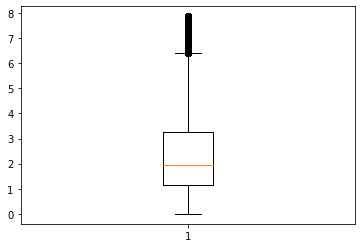

In [57]:
plt.boxplot(df['dist'])

<AxesSubplot:>

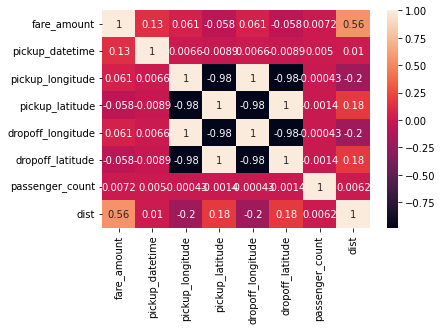

In [58]:
sns.heatmap(df.corr(),annot=True)

In [59]:
df["num_date"] = df['pickup_datetime'].dt.day*1000000 + df['pickup_datetime'].dt.month*10000 + df['pickup_datetime'].dt.year

In [60]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist',
       'num_date'],
      dtype='object')

In [63]:
def plot_graph(y_test, y_pred):
    y_test = y_test.to_numpy()
    plt.scatter(y_test, y_pred, color='b', label='Actual vs. Predicted')
    plt.plot(y_test, y_test, color='r', label='Perfect Fit')

    plt.xlim(0, 70)
    plt.ylim(0, 70)

    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')

    plt.legend()
    plt.show()

In [64]:
def test_model(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)

    r_squared = r2_score(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r_squared)
    print("Mean Absolute Error (MAE):", mae)
    


In [61]:
x = df[[  'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist',
       'num_date']]
y = df['fare_amount']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
def build_and_test(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_model(y_test,y_pred)
    plot_graph(y_test, y_pred)

Mean Squared Error (MSE): 32.325056930052995
Root Mean Squared Error (RMSE): 5.6855128994711635
R-squared (R2): 0.2640673190735927
Mean Absolute Error (MAE): 2.1687838860845923


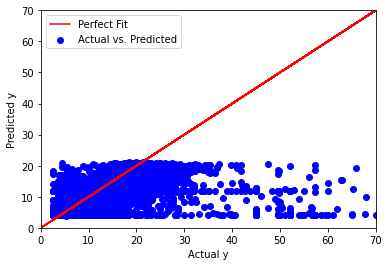

In [67]:
lr = LinearRegression()
build_and_test(lr)

In [70]:

def add_additional_features(df):


    # Extract time features
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['hour_of_day'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month

    # Calculate speed features
    df['trip_duration'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds() / 60
    df['average_speed'] = df['dist'] / (df['trip_duration'] + 1)  # Adding 1 to avoid division by zero

    # Calculate direction features (bearing angle)
    df['delta_longitude'] = df['dropoff_longitude'] - df['pickup_longitude']
    df['delta_latitude'] = df['dropoff_latitude'] - df['pickup_latitude']
    df['direction'] = np.arctan2(df['delta_latitude'], df['delta_longitude'])

    df['distXpc'] = df['passenger_count'] * df['dist']

    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year



    # You can add additional features here based on the available data or external sources

    return df

In [71]:
df = add_additional_features(df)

In [72]:
from datetime import datetime
def get_day_number(day, month, year):
    date_obj = datetime(year, month, day)
    day_number = date_obj.timetuple().tm_yday
    return day_number

In [73]:
df['no_of_day'] = df.apply(lambda row: get_day_number(row['day'], row['month'], row['year']), axis=1)

In [74]:
df.corr()['fare_amount'][df.corr()['fare_amount'] > 0.01].index

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'dropoff_longitude', 'dist', 'distXpc', 'month', 'year', 'day_of_week',
       'trip_duration', 'delta_longitude', 'no_of_day'],
      dtype='object')

In [75]:
x = df[['pickup_longitude', 'dropoff_longitude', 'dist',
       'distXpc', 'month', 'year', 'no_of_day', 'dist', 'day_of_week',
       'trip_duration', 'delta_longitude']]
y = df['fare_amount']

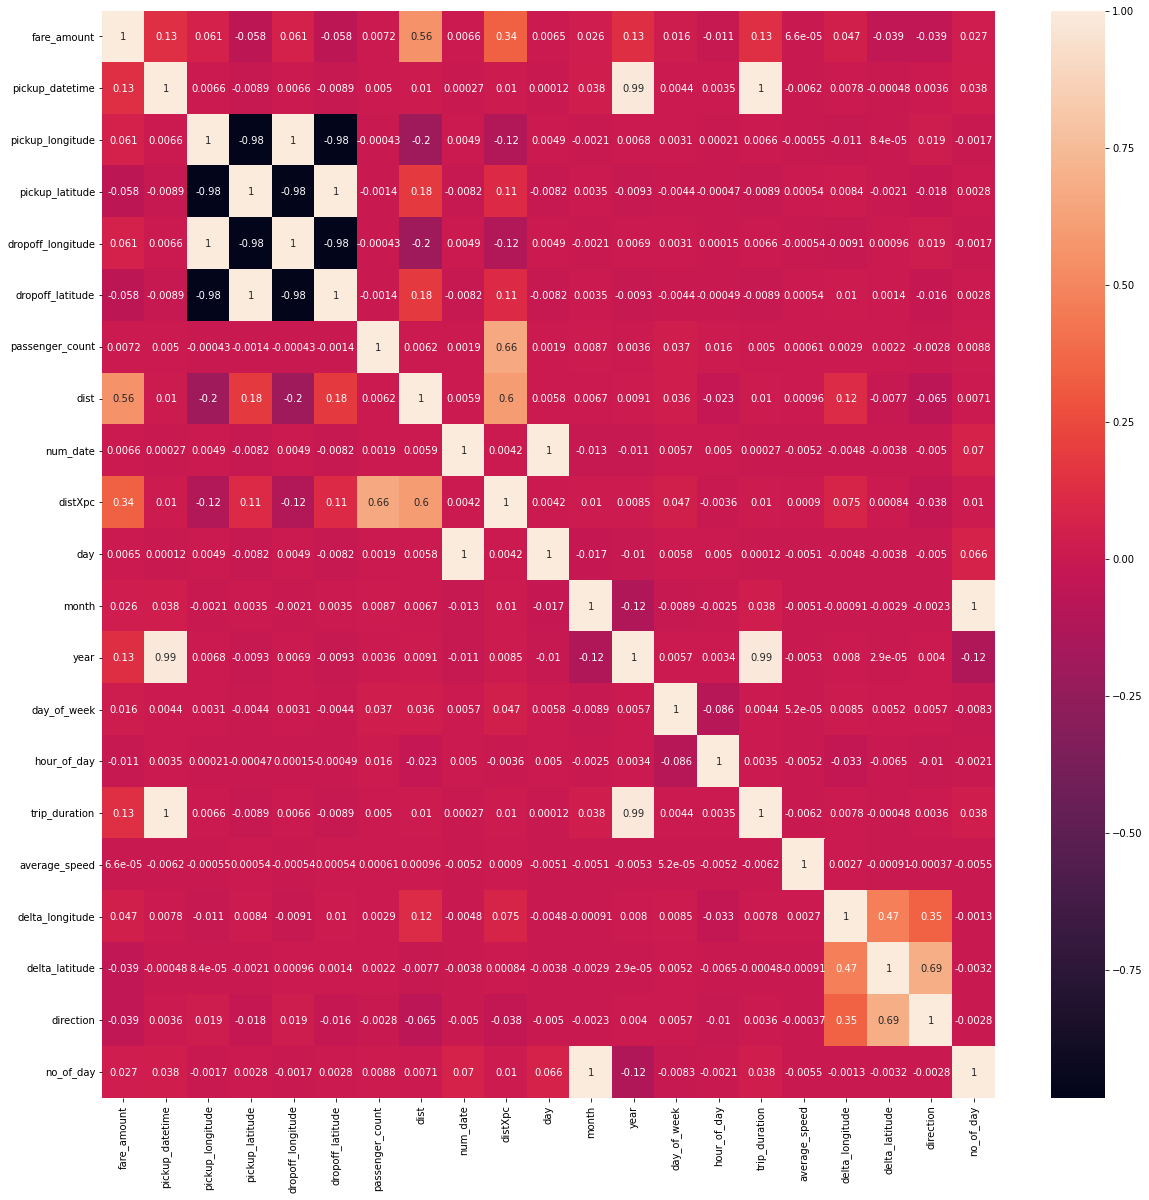

In [76]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

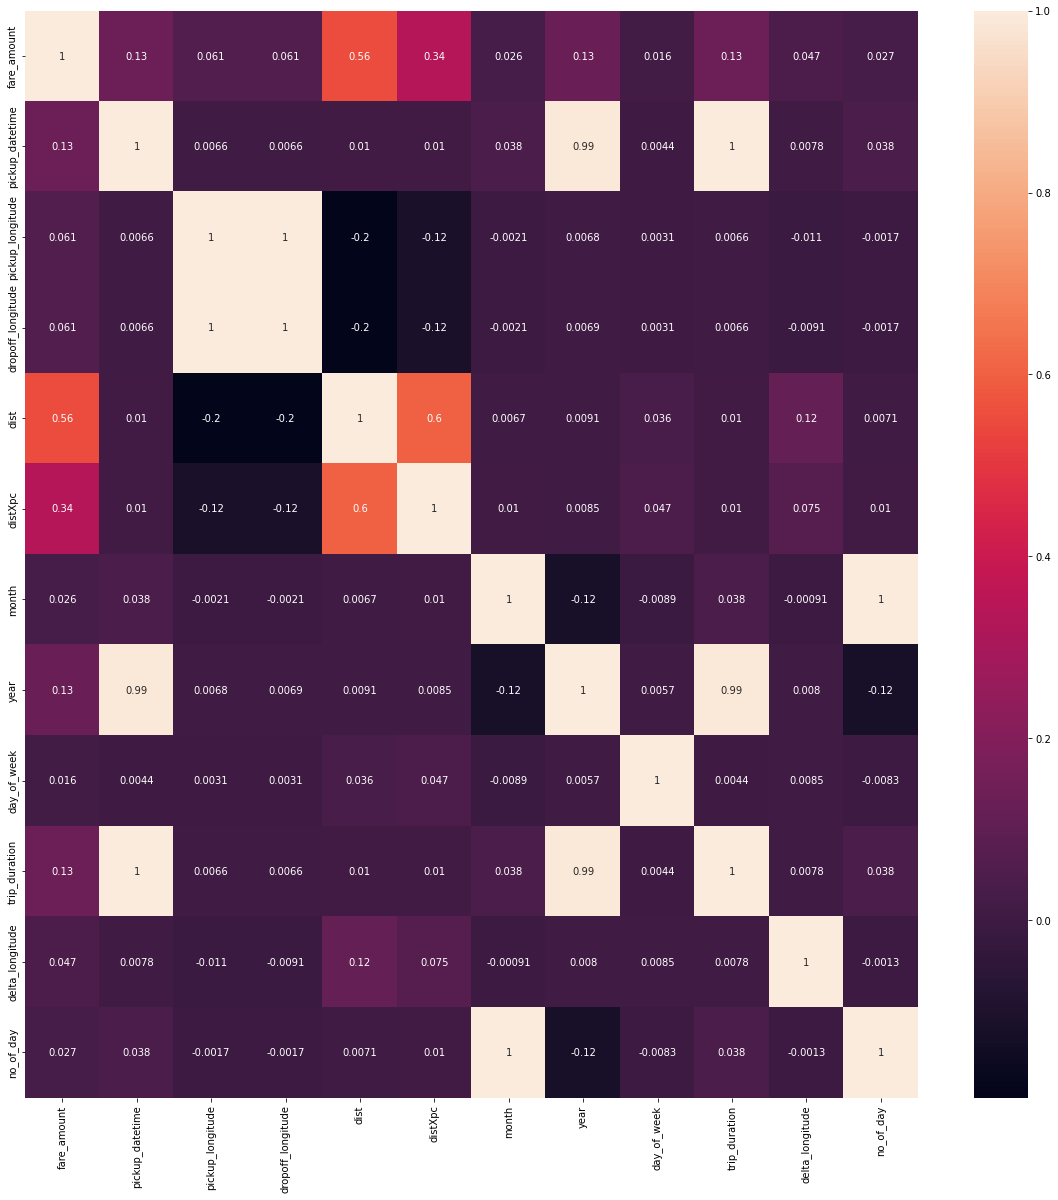

In [77]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[df.corr()['fare_amount'][df.corr()['fare_amount'] > 0.01].index].corr(), annot=True)
plt.show()

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Mean Squared Error (MSE): 28.664682473101166
Root Mean Squared Error (RMSE): 5.353940835786399
R-squared (R2): 0.2991657856143932
Mean Absolute Error (MAE): 2.059272988846658


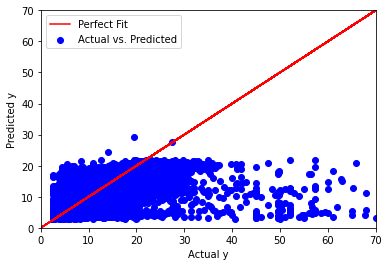

In [79]:
lr = LinearRegression()
build_and_test(lr)

Mean Squared Error (MSE): 26.62560655771161
Root Mean Squared Error (RMSE): 5.160000635437132
R-squared (R2): 0.3490199630878633
Mean Absolute Error (MAE): 1.9443554552815863


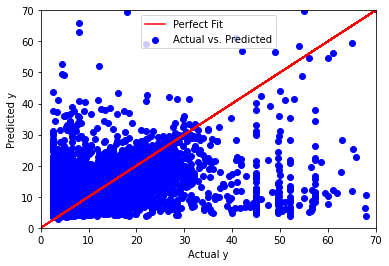

In [80]:
rfr = RandomForestRegressor(n_estimators=70)  
build_and_test(rfr)